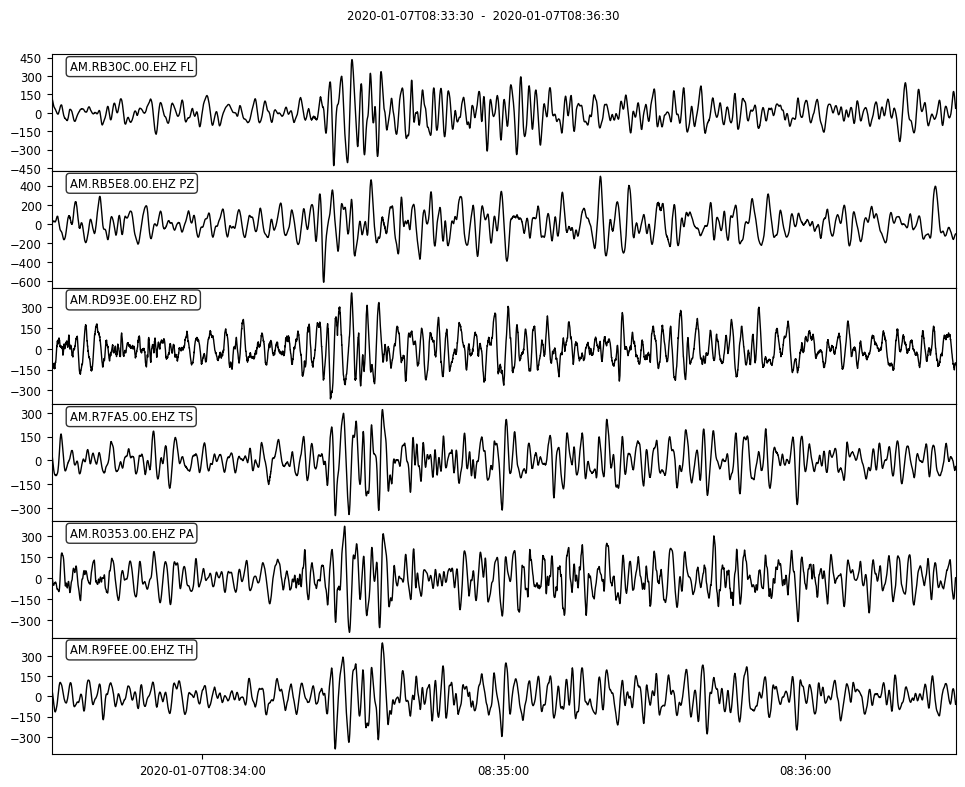

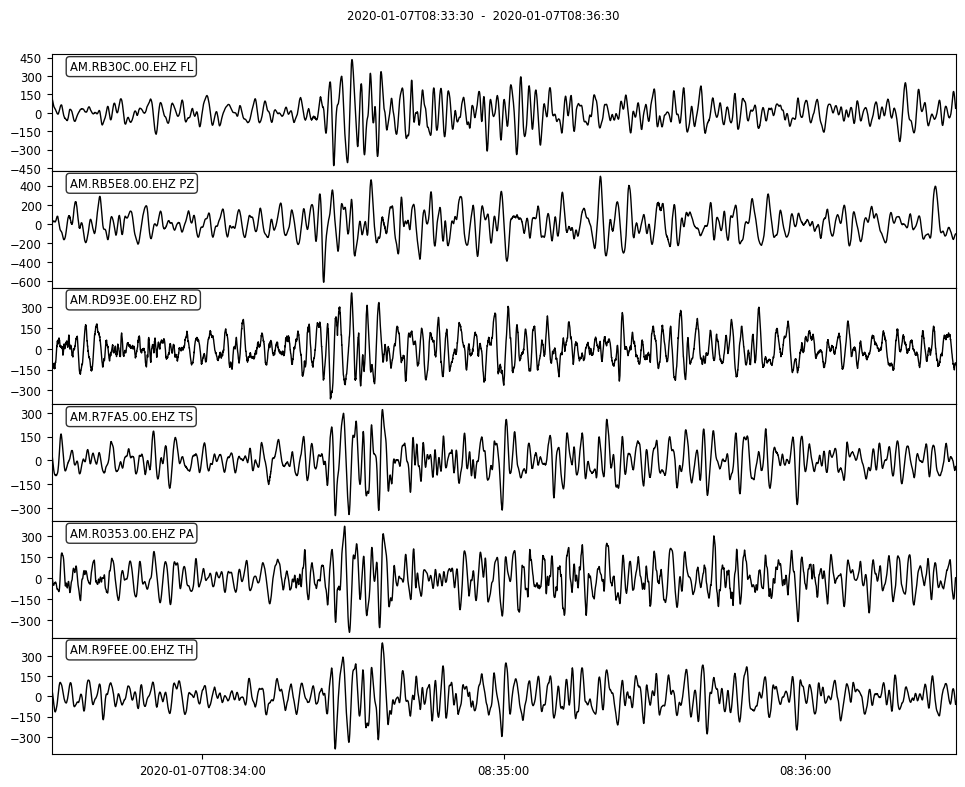

In [31]:
%matplotlib inline
import matplotlib as plt
from obspy.clients.fdsn import Client
client = Client(base_url='https://fdsnws.raspberryshakedata.com/')
from obspy import UTCDateTime
t = UTCDateTime("2020-01-07 08:18:30.000")
[ sbef, saft ] = [ 0, 1200 ]
seislist=['RB30C','RB5E8','RD93E','R7FA5','R0353','R9FEE'] # Seismometer ID
locations=['FL','PZ','RD','TS', 'PA', 'TH'] # Names for the seismometers
waveform = obspy.Stream()
for x in range (0,len(seislist)): # loop through the list of seismometers.
    waveform+=client.get_waveforms('AM',seislist[x],'00','EHZ',t-sbef, t+saft)
    waveform[x].stats.channel += " " + locations[x]
waveform.detrend(type='demean') # place the mean value at zero on the axes
waveform.filter('bandpass', freqmin=0.1, freqmax=1.0, corners=2)
waveform.plot(size=(1024,800),type='normal', automerge=False, equal_scale=False, starttime=t-sbef, endtime=t+saft)